In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from datetime import datetime
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
import torch

sys.path.append("../")
from data_prep import collect, load

date = datetime.now().strftime("%m-%d-%y")

# Collect branch classifier training data

## Get sample points from swc files

In [10]:
# get sample points from swc files
labels_dir = "/home/brysongray/data/neuromorpho"
samples_per_file = 5
files = [f for x in os.walk(labels_dir) for f in glob(os.path.join(x[0], '*.swc'))]
swc_lists = []
for f in files:
    swc_lists.append(load.swc(f))
fnames = [f.split('/')[-1].split('.')[0] for f in files]
sample_points = collect.swc_random_points(samples_per_file, swc_lists, fnames, adjust=True)

loading file: /home/brysongray/data/neuromorpho/mehder/CNG version/Rasha-CA1-Exp-April-2016-right-slide-55-secion-1.CNG.swc
loading file: /home/brysongray/data/neuromorpho/hart/CNG version/2016-10-27_541_mir-1_day_3_5.CNG.swc
loading file: /home/brysongray/data/neuromorpho/hart/CNG version/2016-10-27_541_mir-1_day_3_3.CNG.swc
loading file: /home/brysongray/data/neuromorpho/briggs/CNG version/Bub_9-13_c1.CNG.swc
loading file: /home/brysongray/data/neuromorpho/quinlan/CNG version/KQa4-12-2015-tracing.CNG.swc
loading file: /home/brysongray/data/neuromorpho/beining/CNG version/35dpi_ipsi_infra_06.CNG.swc
loading file: /home/brysongray/data/neuromorpho/kuddannaya/CNG version/Tracetest_N360_semicircle_Map2Tau_79_semi-auto_18.CNG.swc
loading file: /home/brysongray/data/neuromorpho/chiang/CNG version/Cha-F-000302.CNG.swc
loading file: /home/brysongray/data/neuromorpho/chiang/CNG version/Cha-F-600090.CNG.swc
loading file: /home/brysongray/data/neuromorpho/tolias/CNG version/L5MC-J130731a.CNG.sw

In [11]:
# see an example sample points list from one file
sample_points['Rasha-CA1-Exp-April-2016-right-slide-55-secion-1']

array([[ 81.27939962, 450.05821725, 234.19472847],
       [ 29.09022952, 107.63813505, 125.07675749],
       [ 24.71020521, 111.71335575, 196.97749167],
       [ 46.90425454, 205.61001573, 149.97175961],
       [ 80.65928795, 443.80344038, 249.98964387]])

## Save sample patches and labels from image files

In [19]:
# save sample patches from the images centered at the sample points
image_dir = "/home/brysongray/tractography/data_prep/training_data/neuromorpho_with_artifacts"
out_dir = "classifier_data_test"
if not os.path.exists(out_dir):
    os.makedirs(out_dir, exist_ok=True)
name = "neuromorpho_test"

collect.collect_data(sample_points, image_dir, out_dir, name, date)

## View a few example data

(9,)

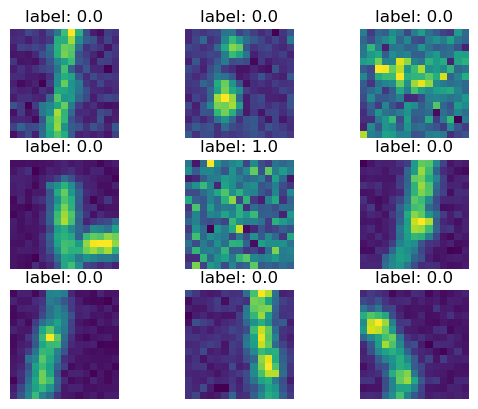

In [ ]:
observations = os.listdir(os.path.join(out_dir, "observations"))
training_annotations = pd.read_csv(glob(os.path.join(out_dir, "*_annotations.csv"))[0])
ids = np.random.choice(len(training_annotations), size=9)
sample = training_annotations.iloc[ids]

fig, ax = plt.subplots(3,3, )
ax = ax.flatten()
for i in range(len(ax)):
    img = torch.load(os.path.join(out_dir,"observations", sample.iloc[i,0]), weights_only=True) # type: ignore
    ax[i].imshow(img[0].amax(0))
    ax[i].set_title(f"label: {sample.iloc[i,1].item()}")
    ax[i].set_axis_off()

    